In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
startup= pd.read_excel ('/content/startup-expansion.xlsx')
startup

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [5]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [6]:
startup.describe()

,Store ID,Marketing Spend,Revenue
count,150.000000,150.000000,150.000000
mean,75.500000,2893.146667,39301.433333
std,43.445368,367.862817,15465.753977
min,1.000000,1811.000000,15562.000000
25%,38.250000,2662.250000,21113.500000
50%,75.500000,2898.000000,42993.000000
75%,112.750000,3111.500000,51145.500000
max,150.000000,3984.000000,68828.000000


In [7]:
startup.isnull().sum()

,0
Store ID,0
City,0
State,0
Sales Region,0
New Expansion,0
Marketing Spend,0
Revenue,0


In [8]:
## checking duplicates
startup.duplicated().sum()

0

In [9]:
startup.columns

Index(['Store ID', 'City', 'State', 'Sales Region', 'New Expansion',
       'Marketing Spend', 'Revenue'],
      dtype='object')

In [ ]:
startup['City'].nunique()

149

In [ ]:
startup['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [ ]:
startup['City'].value_counts()

,count
City,
Rochester,2
Killeen,1
Wichita Falls,1
Naperville,1
Clovis,1
...,...
Akron,1
Fullerton,1
Manchester,1


In [ ]:
startup['State'].nunique()

35

In [ ]:
startup['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [ ]:
startup['State'].value_counts()

,count
State,
California,40
Texas,17
Florida,12
Washington,7
Colorado,5
Illinois,5
Georgia,4
Alabama,4
Connecticut,4


checking null values


In [ ]:
startup['Sales Region'].nunique()

2

In [ ]:
startup['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [ ]:
startup['Sales Region'].value_counts()

,count
Sales Region,
Region 2,86
Region 1,64


In [ ]:
#Total number of stores
startup.columns

Index(['Store ID', 'City', 'State', 'Sales Region', 'New Expansion',
       'Marketing Spend', 'Revenue'],
      dtype='object')

In [ ]:
X= startup['Store ID'].nunique()
print(f'The count of stores are {X}')

The count of stores are 150


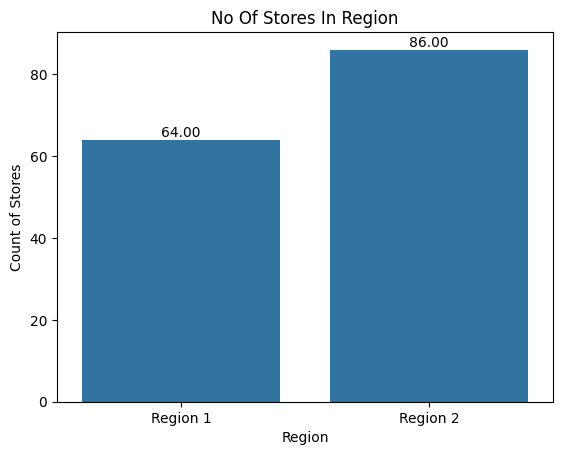

In [ ]:
# No of stores in the Region
no_of_stores =startup.groupby ('Sales Region')['Store ID'].nunique()
sns.barplot(x= no_of_stores.index, y=no_of_stores.values)
for i , value in enumerate(no_of_stores.values):
  plt.text(i, value, f'{value:.2f}', va= 'bottom', ha='center')
plt.title('No Of Stores In Region')
plt.xlabel('Region')
plt.ylabel('Count of Stores')
plt.show()


How much stores in every state

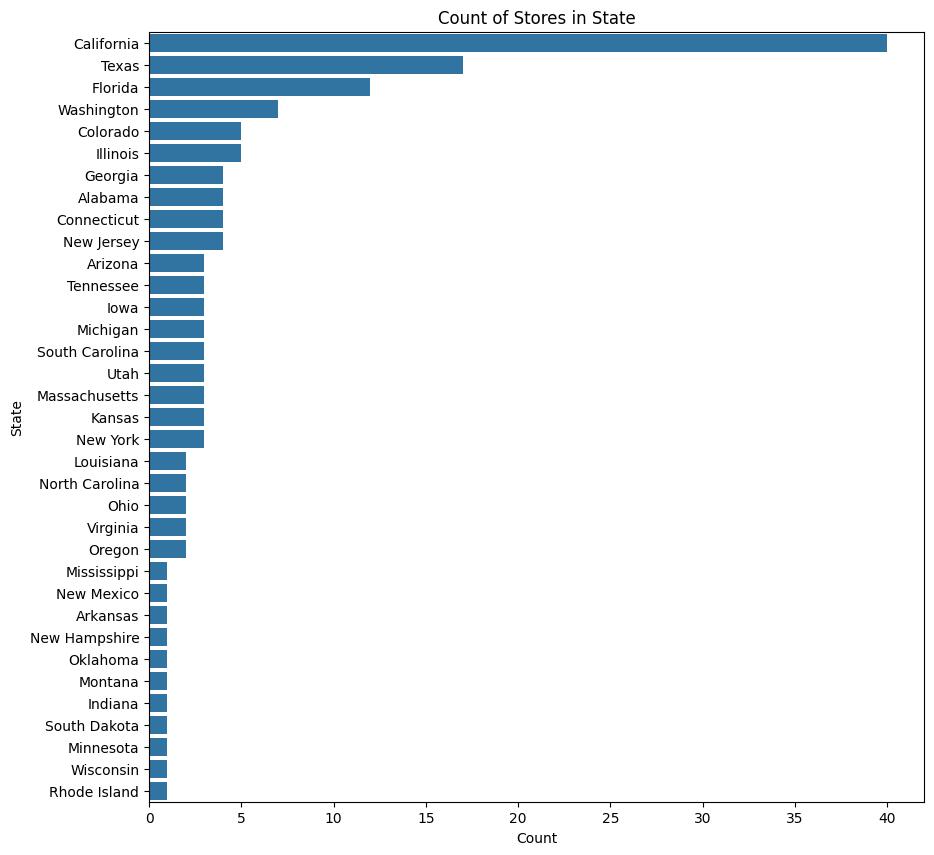

In [ ]:
SC = startup['State'].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(x=SC.values, y=SC.index)

plt.title ('Count of Stores in State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

4. what is the average marketing spend, what is the average revenue for each region?

In [ ]:
startup.groupby('Sales Region')[['Marketing Spend', 'Revenue']].mean().round(2)


,Marketing Spend,Revenue
Sales Region,,
Region 1,2889.00,40567.20
Region 2,2896.23,38359.47


5. Total Revenue, Total Marketing Spend

In [ ]:
print ("The Total Revenue Is : " ,startup['Revenue'].sum())


The Total Revenue Is :  5895215


In [ ]:
print ("The Total Marketung Is : " ,startup['Marketing Spend'].sum())


The Total Marketung Is :  433972


Top 3 States with the *Highest* Revenue

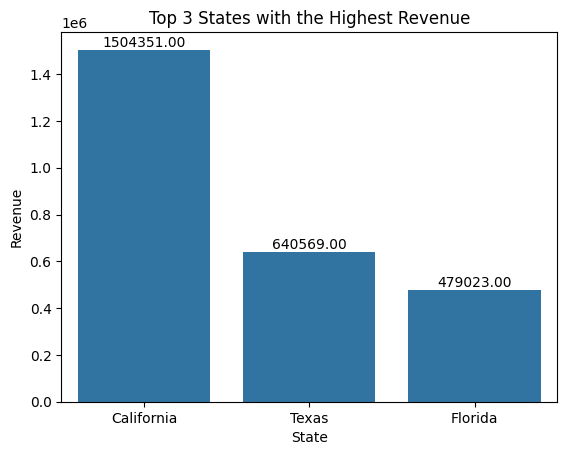

In [11]:
s_top_3 = startup.groupby('State')['Revenue'].sum().sort_values(ascending=False).head(3)

sns.barplot(x=s_top_3.index, y=s_top_3.values)
for i , value in enumerate(s_top_3.values):
  plt.text(i, value, f'{value:.2f}', va= 'bottom', ha='center')
plt.title('Top 3 States with the Highest Revenue')
plt.xlabel('State')
plt.ylabel('Revenue')
plt.show()


Top 3 States with the Lowest Revenue

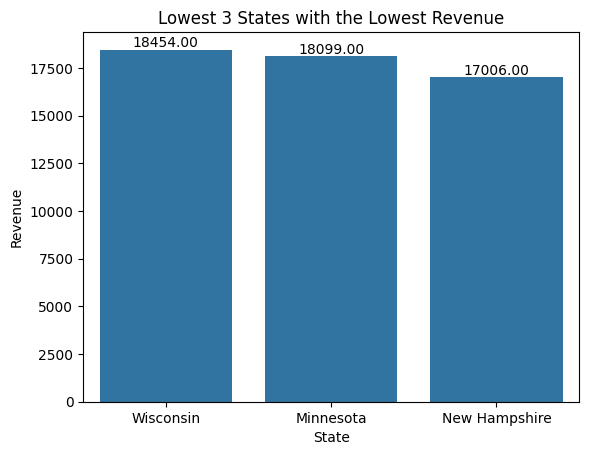

In [16]:
s_top_3 = startup.groupby('State')['Revenue'].sum().sort_values(ascending=False).tail(3)

sns.barplot(x=s_top_3.index, y=s_top_3.values)
for i , value in enumerate(s_top_3.values):
  plt.text(i, value, f'{value:.2f}', va= 'bottom', ha='center')
plt.title('Lowest 3 States with the Lowest Revenue')
plt.xlabel('State')
plt.ylabel('Revenue')
plt.show()

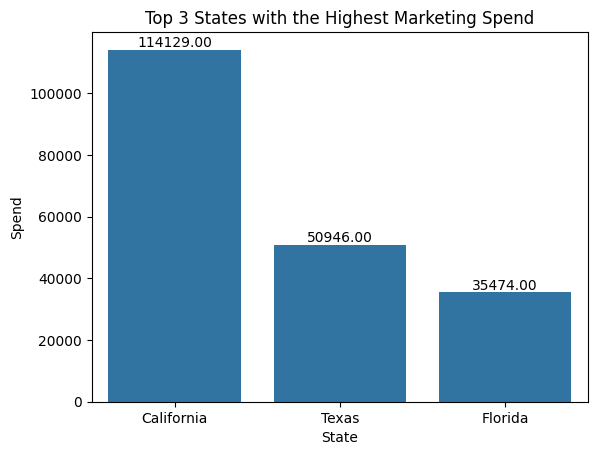

In [13]:
s_top_3 = startup.groupby('State')['Marketing Spend'].sum().sort_values(ascending=False).head(3)

sns.barplot(x=s_top_3.index, y=s_top_3.values)
for i , value in enumerate(s_top_3.values):
  plt.text(i, value, f'{value:.2f}', va= 'bottom', ha='center')
plt.title('Top 3 States with the Highest Marketing Spend')
plt.xlabel('State')
plt.ylabel('Spend')
plt.show()

7.is there a relationship between the revenue and marketing spend

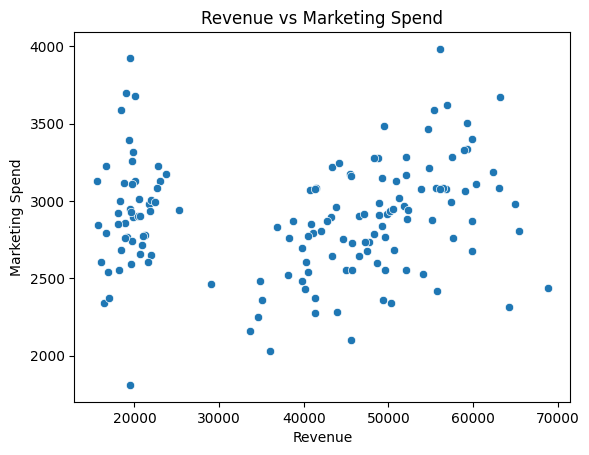

In [ ]:
sns.scatterplot(x=startup['Revenue'], y=startup['Marketing Spend'])
plt.title('Revenue vs Marketing Spend')
plt.xlabel('Revenue')
plt.ylabel('Marketing Spend')
plt.show()

startup

In [ ]:
startup['New Expansion'].value_counts()

,count
New Expansion,
Old,140
New,10


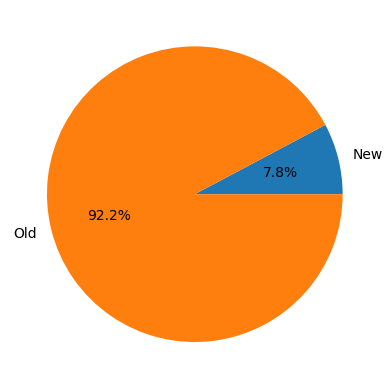

In [ ]:
sum_revenue_N_O= startup.groupby('New Expansion')['Revenue'].sum()
plt.pie(sum_revenue_N_O, labels= sum_revenue_N_O.index,autopct= '%1.1f%%')
plt.show()

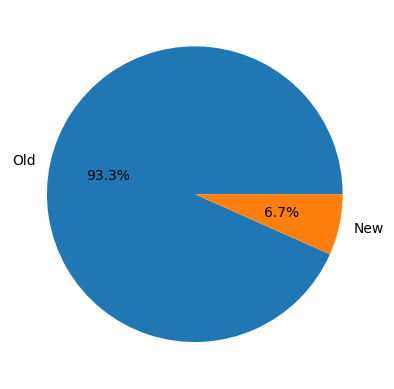

In [ ]:
startup.groupby('New Expansion')['Revenue'].sum()
plt.pie(startup['New Expansion'].value_counts(),labels=startup['New Expansion'].unique(),autopct='%1.1f%%')
plt.show()